/tmp/ipykernel_47/3702437445.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_stats = df.groupby('activity_group')[['sleep_hours', 'mood_level']].mean()


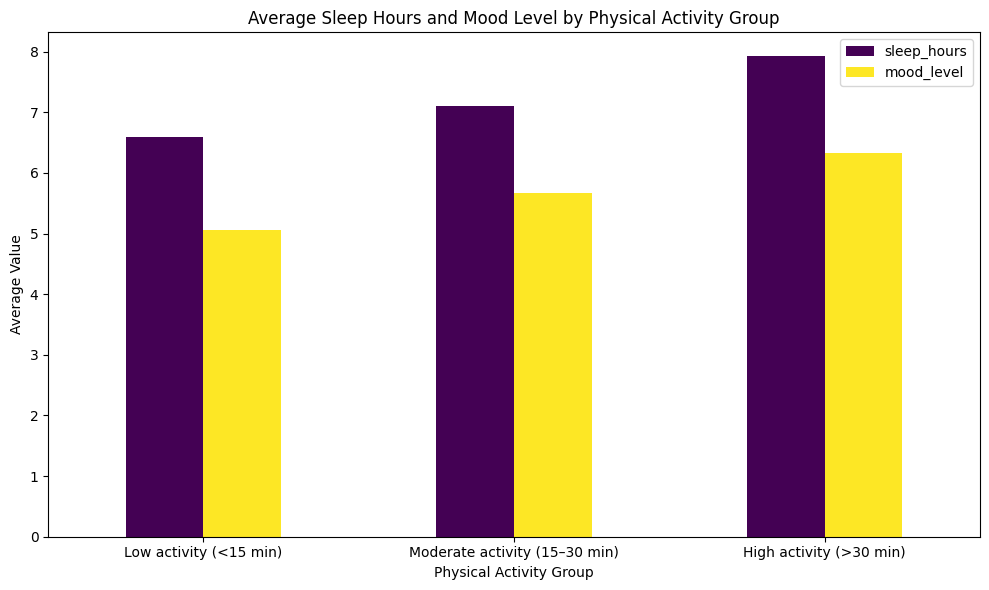

/tmp/ipykernel_47/3702437445.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_stats = df.groupby('activity_group')['daily_screen_time_min'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


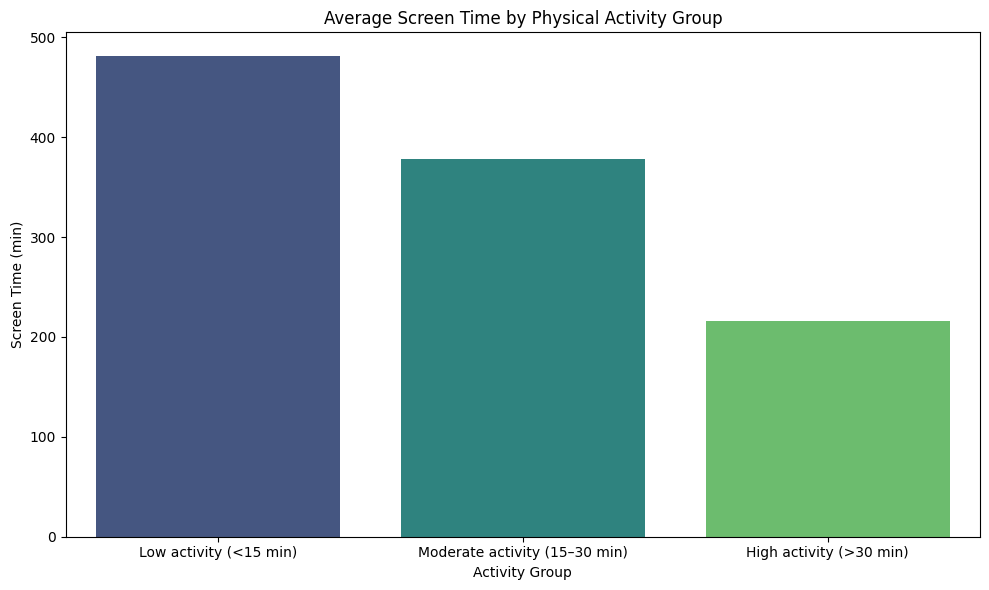

/tmp/ipykernel_47/3702437445.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_stats = df.groupby('sleep_group')['anxiety_level'].mean().sort_values()


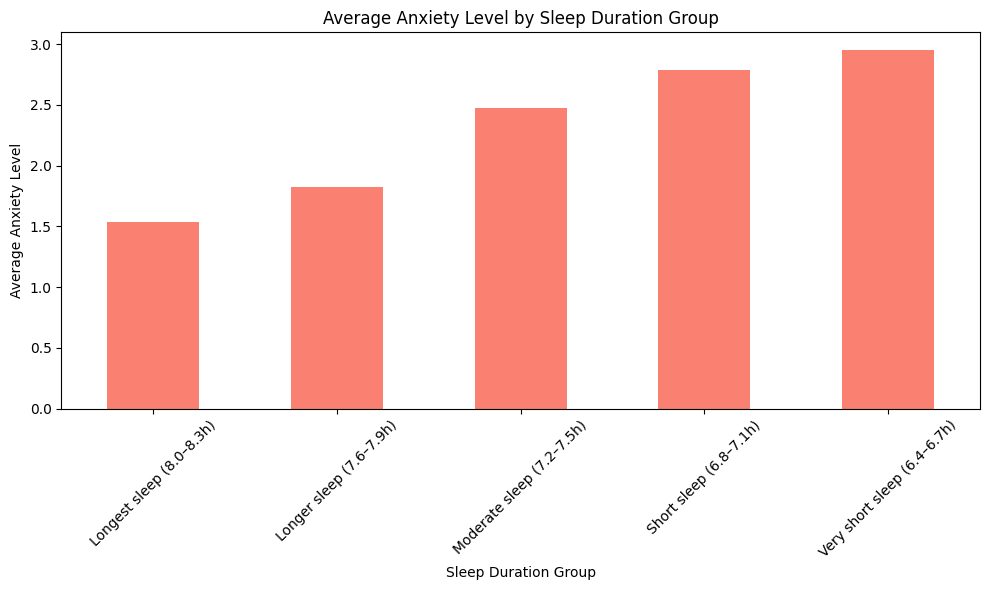

/tmp/ipykernel_47/3702437445.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile = df.groupby(['activity_group', 'sleep_group'])['age'].mean().unstack()
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


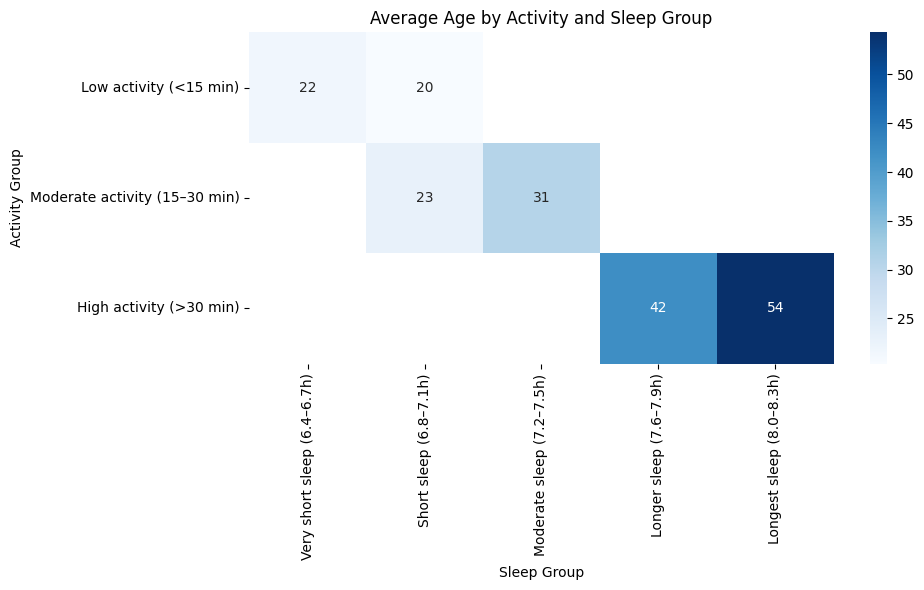

In [2]:
# 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder for saving plots
os.makedirs("physical_and_mental_health", exist_ok=True)

# 2. Load Dataset

df = pd.read_csv("/kaggle/input/mental-health-social-media-correct/mental_health_social_media_correct.csv")

# 3. Visualization 1:
#    Physical Activity vs Sleep & Mood

df['activity_group'] = pd.cut(
    df['physical_activity_min'],
    bins=[0, 15, 30, 100],
    labels=['Low activity (<15 min)', 'Moderate activity (15–30 min)', 'High activity (>30 min)']
)

activity_stats = df.groupby('activity_group')[['sleep_hours', 'mood_level']].mean()

activity_stats.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Average Sleep Hours and Mood Level by Physical Activity Group")
plt.xlabel("Physical Activity Group")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("physical_and_mental_health/activity_sleep_mood.png", dpi=300, bbox_inches='tight')
plt.show()


# 4. Visualization 2 :
#    Average Screen Time by Physical Activity Group

screen_stats = df.groupby('activity_group')['daily_screen_time_min'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=screen_stats,
    x='activity_group',
    y='daily_screen_time_min',
    palette='viridis'
)

plt.title("Average Screen Time by Physical Activity Group")
plt.xlabel("Activity Group")
plt.ylabel("Screen Time (min)")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("physical_and_mental_health/screen_time_by_activity.png", dpi=300, bbox_inches='tight')
plt.show()


# 5. Visualization 3:
#    Sleep Duration vs Anxiety Level

df['sleep_group'] = pd.cut(
    df['sleep_hours'],
    bins=[6.3, 6.7, 7.1, 7.5, 7.9, 8.4],
    labels=[
        'Very short sleep (6.4–6.7h)',
        'Short sleep (6.8–7.1h)',
        'Moderate sleep (7.2–7.5h)',
        'Longer sleep (7.6–7.9h)',
        'Longest sleep (8.0–8.3h)'
    ]
)

sleep_stats = df.groupby('sleep_group')['anxiety_level'].mean().sort_values()

sleep_stats.plot(kind='bar', figsize=(10,6), color='salmon')
plt.title("Average Anxiety Level by Sleep Duration Group")
plt.xlabel("Sleep Duration Group")
plt.ylabel("Average Anxiety Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("physical_and_mental_health/sleep_vs_anxiety.png", dpi=300, bbox_inches='tight')
plt.show()

# 6. Visualization 4:
#    Lifestyle Profiles by Age (Activity × Sleep)

df['anxiety_group'] = df['anxiety_level'].apply(lambda x: 'High anxiety' if x >= 3 else 'Low anxiety')

profile = df.groupby(['activity_group', 'sleep_group'])['age'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(profile, annot=True, cmap='Blues')
plt.title("Average Age by Activity and Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Activity Group")
plt.tight_layout()
plt.savefig("physical_and_mental_health/lifestyle_profiles_age.png", dpi=300, bbox_inches='tight')
plt.show()
